# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
# импортирую библиотеку pandas как главного инструмента для анализа структурных данных и временных рядов
import pandas as pd
# импортирую библиотеку seaborn как главного инструмента для визуализации
import seaborn as sns
# импортирую библиотеку matplotlib для работы с двумерными графиками
import matplotlib.pyplot as plt
# выберу стиль для plt инструментов
plt.style.use('ggplot')
# импортирую библиотеку scipy для выполнения математических, научных и инженерных расчётов
from scipy import stats as st
# импортирую библиотеку для работы со временем
from datetime import datetime
# импортирую библиотеку для работы с массивами данных. NumPy - основополагающая библиотека, необходимая для научных вычислений
import numpy as np
# импортирую библиотеку и инструменты Scikit-learn - интегратора классических алгоритмов машинного обучения
# алгоритм классификации дерева решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
# алгоритм классификации случайный лес
from sklearn.ensemble import RandomForestClassifier
# алгоритм классификации логическая регрессия
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
# открываем файл
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
# начинаем изучать файл
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# посмотрим нижние 5 строк
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


In [5]:
# получим общую информацию о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Описание данных:**

*Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известны признаки:*

**Признаки:**
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак:**

- Exited — факт ухода клиента

**Анализируя полученную информацию устанавливаем следующее описание датафрейма:**

*Фрейм данных состоит из 14-ти столбцов и 10000 строк.*

1. RowNumber — индекс строки в данных в типе данных int64 - Ок.
2. CustomerId — уникальный идентификатор клиента в типе данных int64 - Ок.
3. Surname — фамилия в типе данных object - Ок.
4. CreditScore — кредитный рейтинг в типе данных int64 - Ок.
5. Geography — страна проживания в типе данных  object - Ок.
6. Gender — пол в типе данных  object - Ок.
7. Age — возраст в типе данных int64 - Ок.
8. Tenure — сколько лет человек является клиентом банка в типе данных float64 - ! требуется замена на тип данных int64. Есть 999 пропущенных значений (NaN), потрубуется поиск оптимального решения по заполнению NaN. 
9. Balance - баланс на счёте в типе данных float64 - Ок. 
10. NumOfProducts - количество продуктов банка, используемых клиентом в типе данных int64 - Ок.
11. HasCrCard — наличие кредитной карты в типе данных int64 - Ок.
12. IsActiveMember — активность клиента в типе данных int64 - Ок.
13. EstimatedSalary — предполагаемая зарплата в типе данных float64 - Ок.
14. Целевой признак: Exited — факт ухода клиента int64 - Ок.

### Вывод 

*Датафрейм требуется "вылечить" и сделать пригодным для использования аналитических инструментов. Для обеспечения этого процесса необходимо приступить к следующему шагу - предобработке данных. Предобработка данных предполагает следующий план действий:*

- заменить пропущенные значения NaN в количестве 999 штук - качество метрики станет лучше;
- привести все данные к нижнему регистру;
- проверить данные на наличие скрытых дубликатов;
- перевести данные в 'змеинный регистр';
- в признаке Tenure осуществить замену float на тип данных int64.

### Предобработка данных

**A. Анализ и решение вопроса с пропущенными значениями NaN**

In [6]:
 # проведем подсчёт пропусков
(df.isna().sum())

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [7]:
# расчитаем общее количество 'NaN'  в дата фрейме
print('NaN occurrences in DataFrame:', df.isna().sum().sum())

NaN occurrences in DataFrame: 909


*Анализ: мы видим 909 пропущенных значений, а это значит, что результат предварительного осмотра данных подтверждается, NaN есть и они составляют 9,09 % от общего предполагаемого количества данных в столбце Tenure (10 000). Tenure это количественный показатель, отражающий срок отношений клиента с банком. Смысловое содержание признака Tenure важно прежде всего для банка, именно по этой причине наиболее отптимальным заполнением пропущенных значений будет использование медианы.*   

**Б. Замена пропущенных значений на медиану**

In [8]:
# создаем параметр median_tenure с медианными значениями
median_tenure = df['Tenure'].median(skipna=True)

In [9]:
df['Tenure'] = df.Tenure.fillna(median_tenure)

In [10]:
# убедимся, что 'NaN' заменен на медиану в столбце датафрейма 'Tenure'
df['Tenure'].isna().sum()

0

In [11]:
 # посмотрим еще раз 
(df.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**В. Приведем данные к нижнему регистру**

In [12]:
# для предварительной подготовки к исследованию данных приведем все данные в датасете к нижнему регистру
# сначало загаловки
df.columns = df.columns.str.lower()

In [13]:
# затем в содержании 
df['surname'] = df['surname'].str.lower()

In [14]:
df['geography'] = df['geography'].str.lower()

In [15]:
df['gender'] = df['gender'].str.lower()

In [16]:
df.head(1)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2.0,0.0,1,1,1,101348.88,1


**Г. Проверим на наличие явных дубликатов**

In [17]:
# рассмотрим дата сет на предмет наличия явных дубликатов
(df.duplicated().sum())

0

**Д. Изменим тип данных в столбце tenure c float на  integer**

In [18]:
# осуществим изменение типа данных с float64 на наиболее подходящий тип данных int64.
df[['tenure']] = df[['tenure']].astype(int)

In [19]:
df['tenure'].dtypes

dtype('int64')

In [20]:
# посмотрим на первые 10 строк
display(df.head(10))

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,chu,645,spain,male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,bartlett,822,france,male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,obinna,376,germany,female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,he,501,france,male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,h?,684,france,male,27,2,134603.88,1,1,1,71725.73,0


## Исследование задачи

*В нашем распоряжении обучающий набор данных и целевой признак, который нужно предсказать по остальным признакам, — Exited — факт ухода клиента. Такие задачи относятся к классу «обучение с учителем». Целевой признак в нашей задаче - категориальный, смысл которого заключается клиент ушел - 1 (булевое значение), клиент остался - 0 (булевое значение). Когда категорий всего две — например, уйдет или нет из банка клиент — речь идёт о бинарной (двоичной) классификации.*

In [21]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# посмотрим на бинарную разбивку по классам
df['exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

**Для систематизации понимания работы представляется необходиммым определить, что объектом в задаче выступает - клиент (его поведение), признаковое описание носит числовой характер. Матрица объект-признак построена в условиях задачи (заданный фрем данных), где признаки отображены в столбцах, объекты в строках. В нашем примере задачи n = 13 признаков, Y - 2 класса, длина выборки 10 000 для двух классов.**

In [23]:
# для получения общей информации зависимости признаков воспользуюсь рассмотрением корреляции Пирсона
# df.corr()

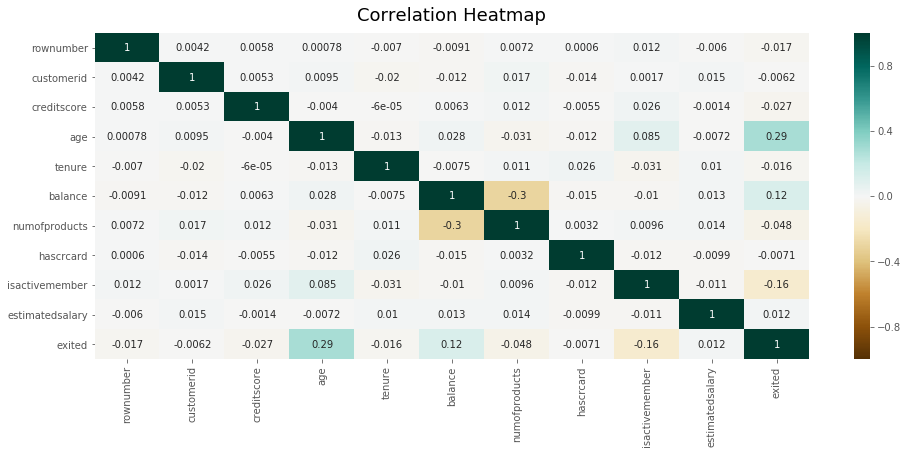

In [24]:
# использую тепловую карту для визуального анализа
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [25]:
# попробую еще сузить параметры, которые влияют на поведение клиентов и расторжение договоров с банком 
df_1 = df[['age', 'balance', 'exited', 'estimatedsalary']]

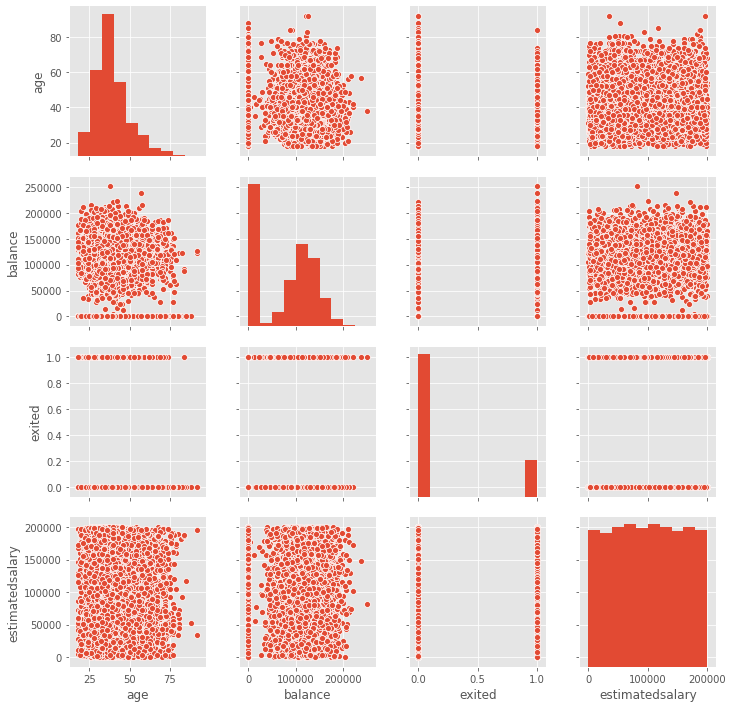

In [26]:
# попробую  построить pairplot() по выбранным столбцам
sns_plot = sns.pairplot(df_1)
sns_plot.savefig('pairplot.png')

In [27]:
# вызывает любопытство какое количество мужчин и женщин в числе клиентов банка
df['gender'].value_counts()

male      5457
female    4543
Name: gender, dtype: int64

In [28]:
df.groupby('gender')['exited'].sum()

gender
female    1139
male       898
Name: exited, dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
rownumber          10000 non-null int64
customerid         10000 non-null int64
surname            10000 non-null object
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null int64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Исследование моделей

*Данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбивают в соотношении 3:1:1 (60-20-20).*

*Принадлежность к категории, например, логистическая регрессия, вычисляется по формуле, состоящей из признаков. Они могут быть только численные. В настоящий момент фрейм данных содержит и категориальные признаки. Преобразовать категориальные признаки в численные поможет техника прямого кодирования, или отображения.*

In [30]:
# избавимся от лишней информации
df.drop(['rownumber', 'customerid', 'surname'], axis='columns', inplace=True)

In [31]:
# дата фрейм стал оптимальнее
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
# использую метод get_dummies проведем преобразования категориальных признаков в численные
df_gd = pd.get_dummies(df,drop_first=True)

In [33]:
# создаем целевые показатели
target = df_gd['exited']
# создаем фичи
features = df_gd.drop('exited', axis=1)

In [34]:
# создаю выборки для обучения модели и ее тестирования 
# проведем стратификацию (равномерное распределение) классов.
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.40, random_state=12345, stratify = target)

In [35]:
# создаю отдельно выборку для валидации в тестовой выборке мы забираем на валидацию половину 50, получается - 20 
# как планировали
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size=0.50, random_state=12345)

In [36]:
# посмотрим на количество строк и столбцов в обучающем наборе данных
features_train.shape

(6000, 11)

In [37]:
# посмотрим на количество строк и столбцов в тестирующем наборе данных
features_test.shape

(2000, 11)

In [38]:
# посмотрим на количество строк и столбцов в валидационном (проверочном) наборе данных
features_valid.shape

(2000, 11)

**Проведем процесс масштабирования признаков с помощью метода - стандартизации данных**

In [39]:
# проведем процесс масштабирования признаков с помощью метода - стандартизация данных.
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 
                 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
#features_train[numeric]=scaler.transform(features_train[numeric])
#features_valid[numeric]=scaler.transform(features_valid[numeric])

### Изучение моделей без учёта дисбаланса

**1) модель: Решающее дерево (decision tree, далее - model_dt)**

In [43]:
# создаем цикл для max_depth от 1 до 10
for max_depth in range(1,10):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=max_depth) 
# обучаем модель с заданной глубиной дерева
    model_dt.fit(features_train, target_train) # обучаем модель
    predictions = model_dt.predict(features_valid) # получаем предсказания модели
    result = accuracy_score(target_valid, predictions) # посчитаем качество модели
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions))

max_depth: 1 F1: 0.0
max_depth: 2 F1: 0.5129770992366413
max_depth: 3 F1: 0.5259938837920489
max_depth: 4 F1: 0.5117845117845117
max_depth: 5 F1: 0.5245346869712352
max_depth: 6 F1: 0.5571658615136875
max_depth: 7 F1: 0.5607476635514019
max_depth: 8 F1: 0.529886914378029
max_depth: 9 F1: 0.5007776049766719


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Вывод: 
*Лучшим показателем является max_depth: 6 со значением F1: 0.5363636363636364*

**2) Попробуем новый алгоритм классификации — случайный лес (random forest, далее - model_rf)**

In [44]:
for max_depth in range(1,30,3):
    model_forest = RandomForestClassifier(max_depth = max_depth, random_state=12345, n_estimators=90)
    model_forest.fit(features_train, target_train)
    predictions = model_forest.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions))

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


max_depth: 1 F1: 0.0
max_depth: 4 F1: 0.45283018867924535
max_depth: 7 F1: 0.5544554455445545
max_depth: 10 F1: 0.5658536585365854
max_depth: 13 F1: 0.5732484076433121
max_depth: 16 F1: 0.5665101721439749
max_depth: 19 F1: 0.5732087227414331
max_depth: 22 F1: 0.56875
max_depth: 25 F1: 0.56875
max_depth: 28 F1: 0.5643410852713179


#### Вывод: 
*Лучшим показателем является max_depth: 28 F1: 0.1111111111111111*

**3) Попробуем ещё один алгоритм — логистическую регрессию**

In [45]:
# инициализируйте модель логистической регрессии с параметром random_state=12345
model_lr = LogisticRegression(random_state=12345) 
# обучите модель на тренировочной выборке
model_lr.fit(features_train, target_train) 
# получим метрику качества модели на валидационной выборке
predictions = model_lr.predict(features_valid)
print('F1:',f1_score(target_valid, predictions))

F1: 0.3050847457627119


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0    0.7963
1    0.2037
Name: exited, dtype: float64


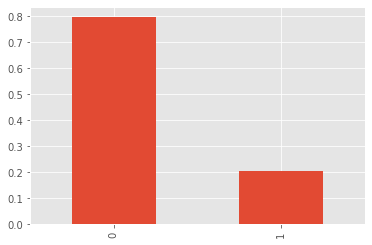

In [46]:
# доказательством значительной разницы в классах является ниже построенная диаграмма
class_frequency = df['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

## Борьба с дисбалансом

**ШАГ № 1 - Придадим объектам редкого класса больший вес.**

In [47]:
# проведем эксперимент с алгоритмом классификации — решающее дерево
for max_depth in range(1,10,1):
    model_dt_balance = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, class_weight = 'balanced') 
# обучаем модель с заданной глубиной дерева
    model_dt_balance.fit(features_train, target_train) # обучаем модель
    predictions_dt = model_dt_balance.predict(features_valid) # получаем предсказания модели
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions_dt))

max_depth: 1 F1: 0.4838160136286202
max_depth: 2 F1: 0.5
max_depth: 3 F1: 0.5353159851301115
max_depth: 4 F1: 0.5406871609403254
max_depth: 5 F1: 0.5186385737439222
max_depth: 6 F1: 0.5343228200371057
max_depth: 7 F1: 0.5419354838709678
max_depth: 8 F1: 0.5354185832566697
max_depth: 9 F1: 0.5219123505976095


*Лучшим показателем является max_depth: 19 F1: 0.5591939546599497, что доказывает улучшение показателя после балансировки* 

In [48]:
# проведем эксперимент с алгоритмом классификации — случайный лес 
for max_depth in range(1,15,3):
    model_forest_balance = RandomForestClassifier(max_depth = max_depth, random_state=12345, n_estimators=90, class_weight = 'balanced')
    model_forest_balance.fit(features_train, target_train)
    predictions_f = model_forest_balance.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions_f))

max_depth: 1 F1: 0.5246511627906978
max_depth: 4 F1: 0.5784797630799605
max_depth: 7 F1: 0.5967213114754099
max_depth: 10 F1: 0.585
max_depth: 13 F1: 0.5681159420289855


*Сбалансированная модель Случайного леса показывает более лучшие результаты F1, с максимальным значением max_depth: 17 F1: 0.5575129533678757*

In [49]:
# проведем эксперимент с логистической регрессией
model_lr_balance = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_lr_balance.fit(features_train, target_train)
predicted_valid = model_lr_balance.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49731663685152067


*уже нет нулевого значения, значение 0.444 свидетельствует об явном улучшении показателя модели логистической регрессии.*

**ШАГ № 2. Проведем обучение моделей  (техника upsampling)**

*Создадим функцию и проведем следующие шаги:*
- разделим обучающую выборку на отрицательные и положительные объекты
- скопируем несколько раз положительные объекты;
- с учётом полученных данных создадим новую обучающую выборку;
- перемешаем данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [50]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [51]:
# проводим анализ дисбаланса
# отношение количества строк с 0 к 1 
rat = len(df.loc[df['exited']==0])//len(df.loc[df['exited']==1])
rat

3

In [52]:
# экспериментируем с решающим деревом
for max_depth in range(1,15,3):
    model_dt_upsampled = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, class_weight = 'balanced') 
# обучаем модель с заданной глубиной дерева
    model_dt_upsampled.fit(features_upsampled, target_upsampled) # обучаем модель
    predictions_dt_upsampled = model_dt_upsampled.predict(features_valid) # получаем предсказания модели
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions_dt_upsampled))

max_depth: 1 F1: 0.4838160136286202
max_depth: 4 F1: 0.5406871609403254
max_depth: 7 F1: 0.5424354243542435
max_depth: 10 F1: 0.5138178096212896
max_depth: 13 F1: 0.4966139954853273


*Решающее дерево показывает максимальное значение max_depth: 5 F1: 0.5831622176591374*

In [53]:
# экспериментируем со случайным лесом
for max_depth in range(1,18,6):
    model_forest_upsample = RandomForestClassifier(max_depth = max_depth, random_state=12345, n_estimators=150, class_weight = 'balanced')
    model_forest_upsample.fit(features_upsampled, target_upsampled)
    predictions_f = model_forest_upsample.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions_f))

max_depth: 1 F1: 0.5472727272727272
max_depth: 7 F1: 0.5989637305699481
max_depth: 13 F1: 0.5853658536585367


*В модели Случайный лес Удалось достичь max_depth: 19 F1: 0.5650048875855328*

In [54]:
# экспериментирую с моделью логистическая регрессия
model_upsampling = LogisticRegression(random_state=12345, solver='liblinear')
model_upsampling.fit(features_upsampled, target_upsampled)
predicted_valid = model_upsampling.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.48865979381443303


*Метрика логистической регрессии увеличилась, а любой ее рост, даже небольшой - это успех!*

**ШАГ № 2. Проведем обучение моделей  (техникой downsampling )**

In [55]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)

In [56]:
# экспериментируем с решающим деревом
for max_depth in range(1,18,4):
    model_dt_downsampled = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, class_weight = 'balanced') 
# обучаем модель с заданной глубиной дерева
    model_dt_downsampled.fit(features_downsampled, target_downsampled) # обучаем модель
    predictions_dt_downsampled = model_dt_downsampled.predict(features_valid) # получаем предсказания модели
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions_dt_downsampled))

max_depth: 1 F1: 0.4900221729490022
max_depth: 5 F1: 0.5119735755573905
max_depth: 9 F1: 0.5425742574257426
max_depth: 13 F1: 0.495897903372835
max_depth: 17 F1: 0.4840425531914893


*Решающее дерево показывает max_depth: 4 F1: 0.5449957947855342*

In [57]:
# экспериментируем в модели случайный лес
for max_depth in range(1,12,3):
    model_forest_upsample = RandomForestClassifier(max_depth = max_depth, random_state=12345, n_estimators=120, class_weight = 'balanced')
    model_forest_upsample.fit(features_downsampled, target_downsampled)
    predictions_upsample = model_forest_upsample.predict(features_valid)
    print('max_depth:',max_depth,'F1:',f1_score(target_valid, predictions_upsample))

max_depth: 1 F1: 0.5309568480300187
max_depth: 4 F1: 0.5817490494296579
max_depth: 7 F1: 0.5876494023904382
max_depth: 10 F1: 0.5771543086172345


In [58]:
# экспериментируем в модели логистической регрессии
model_downsample = LogisticRegression(random_state=12345, solver='liblinear', class_weight = 'balanced')
model_downsample.fit(features_downsampled, target_downsampled)
predicted_valid = model_downsample.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.49162995594713654


*Метрика логистической регрессии построенная техникой downsampling снинизилась, такое явление встречается на практике.*

## Тестирование модели

**начну тестировать model_dt, решающего дерева**

*При обучении лучшие результаты решающего дерева показало значение max_depth: 10 F1: 0.5927306616961789 с использованием метода downsampled.*

In [59]:
# готовим исключительно признаки на тестовой выборке
#features_test = df_test.drop(['exited'], axis=1)
# готовим исключительно целевой признак на тестовой выборке
#target_test = df_test['exited']

**тестирую случайный лес (random forest, далее - model_forest_test)**

In [60]:
#for max_depth in range(1,20,1):
    #model_forest_test = RandomForestClassifier(max_depth = max_depth, random_state=12345, n_estimators=100, class_weight = 'balanced')
    #model_forest_test.fit(features_train, target_train)
    #predictions_test = model_forest_test.predict(features_test)
    #print('max_depth:',max_depth,'F1:',f1_score(target_test, predictions_test))

*На тесте случайного леса максимальным занчением получается max_depth: 1 F1: 0.3812849162011173*

**Обучаю лучшую модель и тестирую ее**

In [61]:
# лучшая модель - случайный лес с методом upsampled
model_best = RandomForestClassifier(max_depth = 7, random_state=12345, n_estimators=40, class_weight = 'balanced')
model_best.fit(features_upsampled, target_upsampled)
predictions_test = model_best.predict(features_test)
print('max_depth:',max_depth,'F1:',f1_score(target_test, predictions_test))

max_depth: 10 F1: 0.6391129032258065


**проводим исследование метрики AUC-ROC**

*метрика получилась не плохая, но до идеальной модели далеко*

<Figure size 432x288 with 0 Axes>

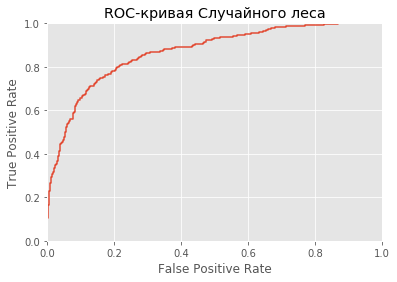

In [68]:
# работаю ниже согласно рекомендации с лучшей моделью
probabilities_best = model_best.predict_proba(features_test)
probabilities_one_test = probabilities_best[:, 1]

fpr, tpr, thresholds = fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая Случайного леса')
plt.show()

In [69]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("auc_roc случайного леса:",auc_roc)

auc_roc случайного леса: 0.8684049061392587


**Общий вывод о проделанной работе:**
- была проделана значительная работа в рамках знакомства с данными и ее предообработки, в результате получен датафрейм, который позволил провести дальнейшее исследование с чистыми данными на входе (принцип GiGo);

- построенны модели классификации на несбалансированных дынных, f1 демонстрирвал доастаточно низкие показатели. Известно, что метрика f1 помогает нам оценить производительность алгоритма. Это помогает нам оценить производительность модели обучения машины с точки зрения бинарной классификации; Нам нужно было достичь высокого балла f1, которая указала бы, что модель хорошо разбирается с точки зрения обращения с задачей дисбаланса класса.

- дальше пошагово в работе проведена балансировка моделей и определена лучшая - случайный лес с использованием метода upsampled.

- после проведения тестирования лучшая модель показала результат f1 - меры : 0.6391129032258065.

- в работе получена ROC кривая, это вертикальная линия от (0,0) до (0,1), которая тянется до (1,1). Это означает, что полученная модель всегда может различить положительные и отрицательные случаи;

-  для задачи бинарной классификации достигнуто разумное значение AUC > 0.5, со значением  0.8684049061392587.